In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_scenario_data(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    #yerr=df.std()
    #print(df)
    #print(yerr)

    df_means = df.groupby("state_name").mean() #.aggregate(['mean', 'std'])
    df_var = df.groupby("state_name").var()

    #print(df_means)
    #df = df[df.state_name != "preflight"]
    try:
        df_means = df_means.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df_means = df_means.drop(["preflight"]) 
    fig = plt.figure(figsize=(18,9))
    ax = df_means.plot(kind = "bar", figsize=(14,6), title=name, yerr=2*df_var, align='center')
    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df



In [286]:
# Extra tool needed to do the box plots
def plot_scenario_data_box(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's


    labels = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']
    df = df.groupby("state_name").mean()

    
    #df = df[df.state_name != "preflight"]
    try:
        df = df.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df = df.drop(["preflight"]) 
    fig = plt.figure(figsize=(18,9))
    #ax = df.plot(figsize=(14,6), title=name)
    ax = plt.gca()
    bplot1 = ax.boxplot(df,
                        #notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color)
                        labels=labels
    )
    
    colors = ['pink', 'lightblue', 'lightgreen', 'blue', 'red']

    zipped = zip(bplot1['boxes'], colors)
    for patch, color in zipped:
        patch.set_facecolor(color)

    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df




In [287]:

df_scen1 = pd.read_csv("./data/stress_data_scenario_one__.csv") #simple
#df_scen1_b = pd.read_csv("./data/stress_data_scenario_one__23-05.csv")

df_scen2 = pd.read_csv("./data/stress_data_scenario_two__.csv") #wind
df_scen3 = pd.read_csv("./data/stress_data_scenario_three__.csv") #fuel

df_scen4 = pd.read_csv("./data/stress_data_scenario_four__.csv") #extreme

#df_scen5 = pd.read_csv("./data/stress_data_scenario_five__17-05.csv")

# TODO: Rename models to correspond with slide naming

In [233]:

def compute_ci(df):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    condition_names = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']

    for condition in condition_names:
        print("-------")
        col_stats = df[[condition, "state_name"]].groupby("state_name").agg(['mean', 'count', 'std'])
        #print(col_stats)

        try:
            stats = col_stats.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
        except KeyError:
            stats = col_stats.drop(["preflight"]) 

        #print(stats)

        ci95_hi = []
        ci95_lo = []

        for i in stats.index:
            #print(i)
            m, c, s = stats.loc[i]
            ci95_hi.append(m + 1.96*s/math.sqrt(c))
            ci95_lo.append(m - 1.96*s/math.sqrt(c))

        stats['ci95_hi'] = ci95_hi
        stats['ci95_lo'] = ci95_lo
        print(stats)


compute_ci(df_scen1)


-------
           Heuristic Stress                   ci95_hi   ci95_lo
                       mean count       std                    
state_name                                                     
flying             0.316704   590  0.120076  0.326394  0.307015
landing            0.654894   108  0.102600  0.674245  0.635544
takeoff            0.345440   109  0.084131  0.361235  0.329646
-------
           Predictability-Control Stress                   ci95_hi   ci95_lo
                                    mean count       std                    
state_name                                                                  
flying                          0.294120   590  0.109005  0.302916  0.285324
landing                         0.262684   108  0.096491  0.280883  0.244486
takeoff                         0.182364   109  0.083935  0.198122  0.166607
-------
           Value Stress                   ci95_hi   ci95_lo
                   mean count       std                    
state_name

<Figure size 1296x648 with 0 Axes>

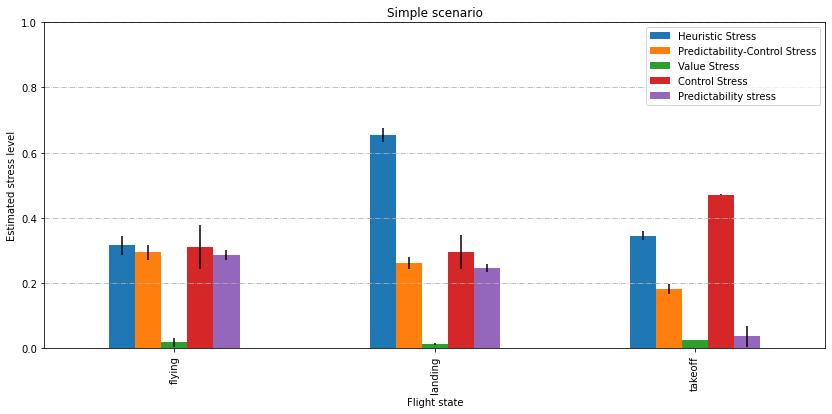

      Heuristic Stress  Predictability-Control Stress  Value Stress  \
0            -1.000000                      -1.000000     -1.000000   
1             0.404766                       0.160881      0.025611   
2             0.094674                       0.466239      0.023096   
3             0.313816                       0.358824      0.000000   
4             0.220492                       0.207482      0.000000   
...                ...                            ...           ...   
1002          0.279311                       0.205245      0.000000   
1003          0.346885                       0.156314      0.000000   
1004          0.428375                       0.178600      0.000000   
1005          0.744523                       0.222032      0.000000   
1006          0.633871                       0.501213      0.000000   

      Control Stress  Predictability stress state_name  
0          -1.000000              -1.000000  preflight  
1           0.482644             

In [288]:
df = plot_scenario_data(df_scen1, name="Simple scenario")
#df2 = plot_scenario_data(df_scen1_b)
print(df)

In [289]:
#df = plot_scenario_data(df_scen1_b, name="Simple scenario, test with updated data for blue")
#print(df)
# -> no difference

<Figure size 1296x648 with 0 Axes>

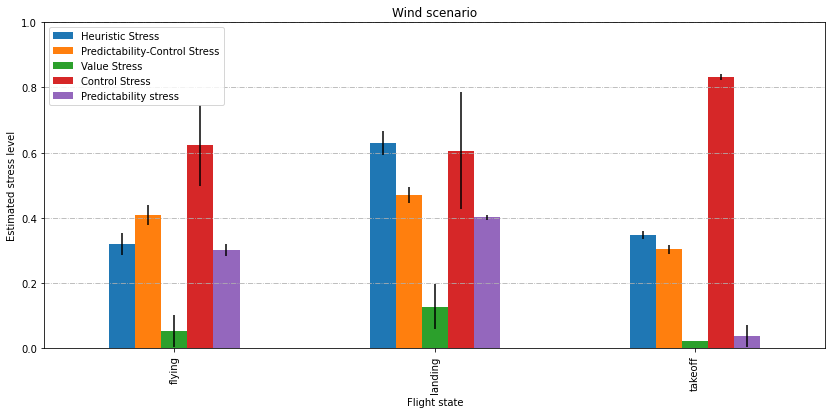

      Heuristic Stress  Predictability-Control Stress  Value Stress  \
0            -1.000000                      -1.000000     -1.000000   
1             0.417585                       0.278494      0.022855   
2             0.045455                       0.585973      0.020813   
3             0.159157                       0.496394      0.020653   
4             0.286690                       0.468326      0.020419   
...                ...                            ...           ...   
1042          0.337105                       0.551700      0.019633   
1043          0.607090                       0.583603      0.036970   
1044          0.538316                       0.495411      0.156779   
1045          0.713163                       0.397935      0.153569   
1046          0.763022                       0.435587      0.160528   

      Control Stress  Predictability stress state_name  
0          -1.000000              -1.000000  preflight  
1           0.835483             

In [290]:
df = plot_scenario_data(df_scen2, name="Wind scenario")
print(df)

<Figure size 1296x648 with 0 Axes>

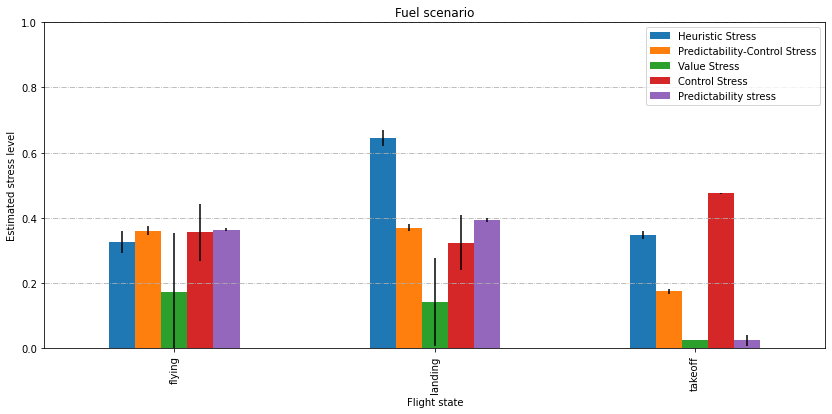

      Heuristic Stress  Predictability-Control Stress  Value Stress  \
0            -1.000000                      -1.000000     -1.000000   
1             0.333165                       0.159008      0.025155   
2             0.212329                       0.410173      0.023537   
3             0.305416                       0.364417      0.000000   
4             0.288068                       0.260470      0.000000   
...                ...                            ...           ...   
1031          0.470308                       0.532273      0.844017   
1032          0.460228                       0.403266      0.841004   
1033          0.503417                       0.346974      0.883426   
1034          0.765077                       0.347722      0.924045   
1035          0.743698                       0.477368      0.346434   

      Control Stress  Predictability stress state_name  
0          -1.000000              -1.000000  preflight  
1           0.477024             

In [291]:
df = plot_scenario_data(df_scen3, name="Fuel scenario")
print(df)

<Figure size 1296x648 with 0 Axes>

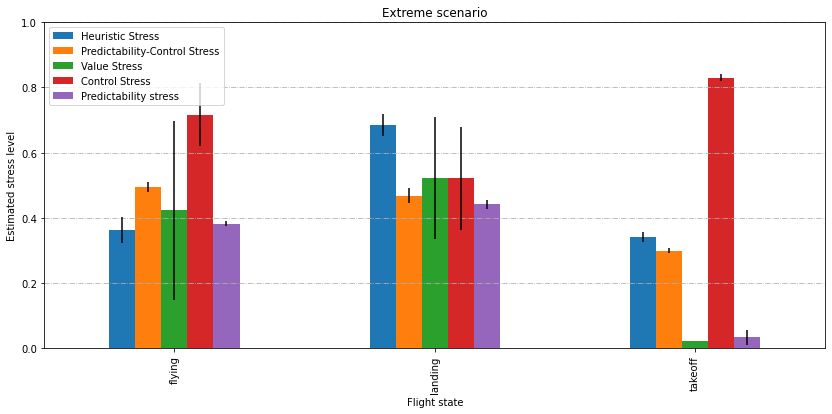

      Heuristic Stress  Predictability-Control Stress  Value Stress  \
0            -1.000000                      -1.000000     -1.000000   
1             0.483810                       0.278570      0.021606   
2             0.254988                       0.534608      0.023041   
3             0.125141                       0.485379      0.055526   
4             0.360980                       0.478315      0.093365   
...                ...                            ...           ...   
1154          0.489814                       0.525434      0.566920   
1155          0.367043                       0.531412      0.699921   
1156          0.381321                       0.616947      0.881490   
1157          0.505665                       0.649504      0.979637   
1158          0.849857                       0.439063      0.999352   

      Control Stress  Predictability stress state_name  
0          -1.000000              -1.000000  preflight  
1           0.835709             

In [292]:
df = plot_scenario_data(df_scen4, name="Extreme scenario")
print(df)